<a href="https://colab.research.google.com/github/RonakRaj-dev/Sentiment-Analysis-/blob/main/Sentiment_Analysis_by_Ronak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --user -U nltk


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install TextBlob
!pip install --user -U  WordCloud


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# **Necessay Modules to be installed**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import string
import re
import nltk
import nltk.corpus
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gamer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gamer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gamer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import TfidfVectorizer

from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.model_selection import train_test_split

In [4]:
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# **Reading the CSV files**

In [5]:
dataset = pd.read_csv("IMDB Dataset.csv")

In [6]:
dataset.shape

(50000, 2)

In [7]:
dataset.isnull().sum()

review       0
sentiment    0
dtype: int64

In [8]:
dataset.describe(include="all")

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [9]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gamer\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [10]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download required NLTK resources
nltk.download('vader_lexicon')
nltk.download('punkt')

# Initialize Sentiment Analyzer (once outside the loop for efficiency)
sid = SentimentIntensityAnalyzer()

# Create new columns for counts
dataset['positive_count'] = 0
dataset['negative_count'] = 0

for index, row in dataset.iterrows():
    review = row['review']

    # Convert to string and tokenize
    if isinstance(review, (list, tuple)):  # If review is stored as tokens
        review_text = ' '.join(map(str, review))
    else:  # If review is a string
        review_text = str(review)

    words = word_tokenize(review_text)

    pos_count = 0
    neg_count = 0

    for word in words:
        scores = sid.polarity_scores(word)

        # Check positive condition
        if scores['pos'] > max(scores['neg'], scores['neu']) and scores['pos'] > 0.1:
            pos_count += 1
        # Check negative condition
        elif scores['neg'] > max(scores['pos'], scores['neu']) and scores['neg'] > 0.1:
            neg_count += 1

    # Store counts in DataFrame
    dataset.at[index, 'positive_count'] = pos_count
    dataset.at[index, 'negative_count'] = neg_count

# Optional: View the results
print(dataset[['review', 'positive_count', 'negative_count']].head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gamer\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gamer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                              review  positive_count  \
0  One of the other reviewers has mentioned that ...               9   
1  A wonderful little production. <br /><br />The...              12   
2  I thought this was a wonderful way to spend ti...              14   
3  Basically there's a family where a little boy ...               6   
4  Petter Mattei's "Love in the Time of Money" is...              14   

   negative_count  
0              24  
1               3  
2               5  
3               6  
4               3  


In [11]:
dataset.head(30)

,review,sentiment,positive_count,negative_count
0,One of the other reviewers has mentioned that ...,positive,9,24
1,A wonderful little production. <br /><br />The...,positive,12,3
2,I thought this was a wonderful way to spend ti...,positive,14,5
3,Basically there's a family where a little boy ...,negative,6,6
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,14,3
5,"Probably my all-time favorite movie, a story o...",positive,8,2
6,I sure would like to see a resurrection of a u...,positive,7,2
7,"This show was an amazing, fresh & innovative i...",negative,14,8
8,Encouraged by the positive comments about this...,negative,9,9
9,If you like original gut wrenching laughter yo...,positive,7,1


# **Formula to Calculate the Rating according to number of Positive and Negative Counts**

In [12]:
# Calculate ratings
def calculate_rating(row):
    pos = row['positive_count']
    neg = row['negative_count']
    total = pos + neg + 1e-9
    raw_score = ((pos - neg) / total) * 5 + 5
    return np.clip(raw_score, 5, 10)

dataset['rating'] = dataset.apply(calculate_rating, axis=1)
dataset['rating'] = dataset['rating'].round(0)

print(dataset[['sentiment','positive_count', 'negative_count', 'rating']])

      sentiment  positive_count  negative_count  rating
0      positive               9              24     5.0
1      positive              12               3     8.0
2      positive              14               5     7.0
3      negative               6               6     5.0
4      positive              14               3     8.0
...         ...             ...             ...     ...
49995  positive              14               3     8.0
49996  negative               9               9     5.0
49997  negative              15              11     6.0
49998  negative               7               7     5.0
49999  negative               9               4     7.0

[50000 rows x 4 columns]


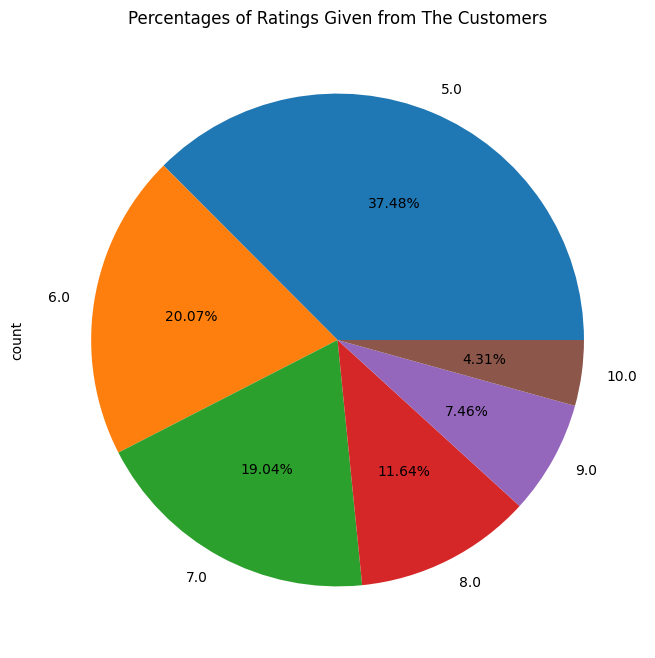

In [13]:
dataset.rating.value_counts().plot(kind = "pie", legend = False, autopct = "%1.2f%%", fontsize = 10, figsize=(8,8))
plt.title("Percentages of Ratings Given from The Customers", loc = "center")
plt.show()

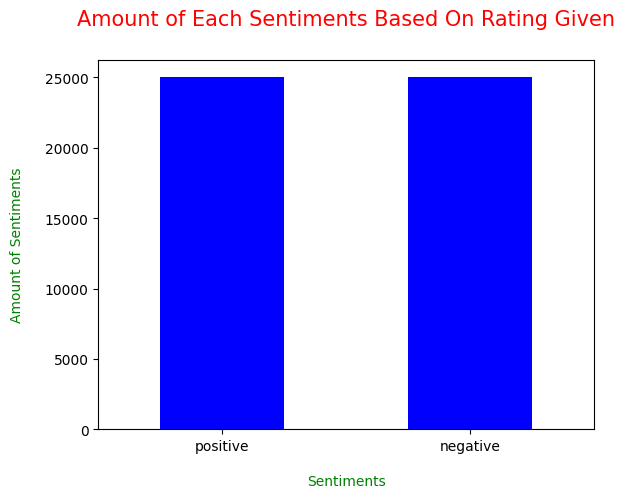

In [14]:
dataset["sentiment"].value_counts().plot(kind = "bar", color = "blue")
plt.title("Amount of Each Sentiments Based On Rating Given", loc = "center", fontsize = 15, color = "red", pad = 25)
plt.xlabel("Sentiments", color = "green", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Amount of Sentiments", color = "green", fontsize = 10, labelpad = 15)
plt.show()

In [15]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [16]:
punctuation = string.punctuation
stopwords = nltk.corpus.stopwords.words('english')
st = PorterStemmer()
lm = WordNetLemmatizer()

In [17]:
def clean_text(text):
    text = "".join([char.lower() for char in text if char not in punctuation])
    tokens = re.split(r'\W+', text)
    text = " ".join([lm.lemmatize(char) for char in tokens if char.lower() not in stopwords])
    return text

In [18]:
X = dataset['review'].apply(lambda x: clean_text(x))

In [19]:
Y = dataset['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding,TextVectorization, Dropout

In [22]:
vocab_size = 10000
max_len = 300
vectorize_layer = TextVectorization(
 max_tokens=vocab_size,
 output_mode='int',
 output_sequence_length=max_len)

In [23]:
# build the vocabulary
vectorize_layer.adapt(X_train)

In [24]:
# Stopwords
Stopwords = set(nltk.corpus.stopwords.words("english")) - set(["not"])
print(Stopwords)

# def Text_Processing(Text):
#   Processed_Text = list()
#   Lemmatizer = WordNetLemmatizer()

#   # Tokens of Words
#   Tokens = nltk.word_tokenize(Text)

#   # Removing Stopwords and Lemmatizing Words
#   # To reduce noises in our dataset, also to keep it simple and still
#   # powerful, we will only omit the word `not` from the list of stopwords

#   for word in Tokens:
#     if word not in Stopwords:
#       Processed_Text.append(Lemmatizer.lemmatize(word))

#   return(" ".join(Processed_Text))

{'into', 'own', 'that', "we're", "they'd", "they've", 'after', 'ain', 'herself', "we'd", 'in', 'was', 'ma', 'below', 'by', 'an', "you've", 'her', 'between', 'here', 'where', 'if', 'above', 'their', 'being', "it's", 'while', 'before', 'mightn', 'about', 'more', 'yourself', 'other', 'itself', 'than', "don't", 'haven', 'yourselves', 'all', 'its', "you'll", 'll', "we'll", 'any', 'from', 'can', 'your', 'both', "wouldn't", 'now', 'just', 'the', 'his', 'i', "i'm", "we've", 'shouldn', 'up', "couldn't", 'didn', 'm', 'with', 'these', 'very', 'did', "i've", 'o', 'will', "shan't", 'had', 'aren', 'it', 'there', 'off', 'don', 'were', "he'll", 'mustn', 'no', "should've", 'then', 'few', "aren't", 'won', "they'll", 'is', 're', 'myself', 'hasn', 'shan', 'so', 'they', "weren't", "it'll", 'theirs', 'too', "she'd", 'couldn', 'am', 'what', 'nor', 'you', 'again', "he's", "shouldn't", 'him', 's', 'this', 'because', 'once', 'most', 'has', 'down', "isn't", "he'd", 'she', 'each', 'at', "you'd", 'ourselves', "has

In [25]:
from tensorflow.keras.layers import Input

In [26]:
model = Sequential()
model.add(Input(shape=(1,), dtype=string))

model.add(vectorize_layer)
model.add(Embedding(vocab_size, 100))
model.add(LSTM(100))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ text_vectorization                   │ (None, 300)                 │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 300, 100)            │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,086,929 (4.15 MB)

 Trainable params: 1,086,929 (4.15 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [28]:
history = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),batch_size=32,epochs=20)

Epoch 1/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 210s 176ms/step - accuracy: 0.5039 - loss: 0.6949 - val_accuracy: 0.5046 - val_loss: 0.6935
Epoch 2/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 228s 195ms/step - accuracy: 0.5063 - loss: 0.6934 - val_accuracy: 0.5051 - val_loss: 0.6928
Epoch 3/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 217s 185ms/step - accuracy: 0.5102 - loss: 0.6915 - val_accuracy: 0.5117 - val_loss: 0.6896
Epoch 4/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 220s 188ms/step - accuracy: 0.5236 - loss: 0.6720 - val_accuracy: 0.7976 - val_loss: 0.4589
Epoch 5/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 213s 182ms/step - accuracy: 0.8543 - loss: 0.3612 - val_accuracy: 0.8716 - val_loss: 0.3061
Epoch 6/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 203s 173ms/step - accuracy: 0.9311 - loss: 0.1973 - val_accuracy: 0.8821 - val_loss: 0.2963
Epoch 7/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 250s 213ms/step - accuracy: 0.9602 - loss: 0.1242 - val_accuracy: 0.8827 - val_loss: 0.3254
Epoch 8/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 225s 192ms/step - ac

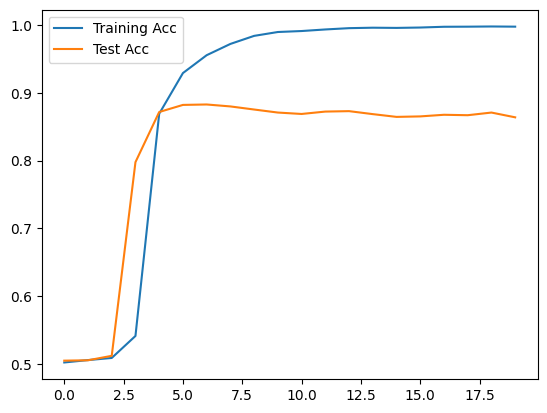

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='Training Acc')
plt.plot(history.history['val_accuracy'],label='Test Acc')
plt.legend()
plt.show()

In [30]:
dataset.head(10)

,review,sentiment,positive_count,negative_count,rating
0,One of the other reviewers has mentioned that ...,positive,9,24,5.0
1,A wonderful little production. <br /><br />The...,positive,12,3,8.0
2,I thought this was a wonderful way to spend ti...,positive,14,5,7.0
3,Basically there's a family where a little boy ...,negative,6,6,5.0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,14,3,8.0
5,"Probably my all-time favorite movie, a story o...",positive,8,2,8.0
6,I sure would like to see a resurrection of a u...,positive,7,2,8.0
7,"This show was an amazing, fresh & innovative i...",negative,14,8,6.0
8,Encouraged by the positive comments about this...,negative,9,9,5.0
9,If you like original gut wrenching laughter yo...,positive,7,1,9.0


In [31]:
dataset["polarity"] = dataset["review"].map(lambda Text: TextBlob(Text).sentiment.polarity)

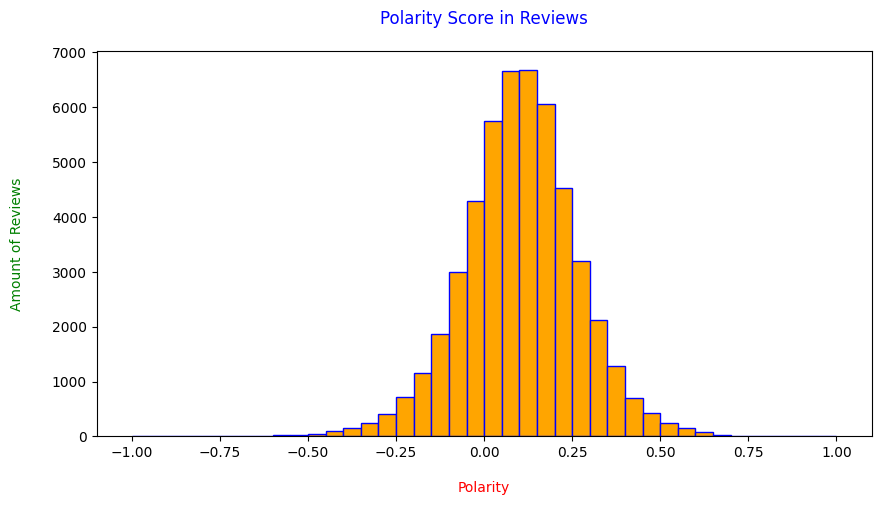

In [32]:
dataset["polarity"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Polarity Score in Reviews", color = "blue", pad = 20)
plt.xlabel("Polarity", labelpad = 15, color = "red")
plt.ylabel("Amount of Reviews", labelpad = 20, color = "green")

plt.show()

In [33]:
dataset["length"] = dataset["review"].astype(str).apply(len)

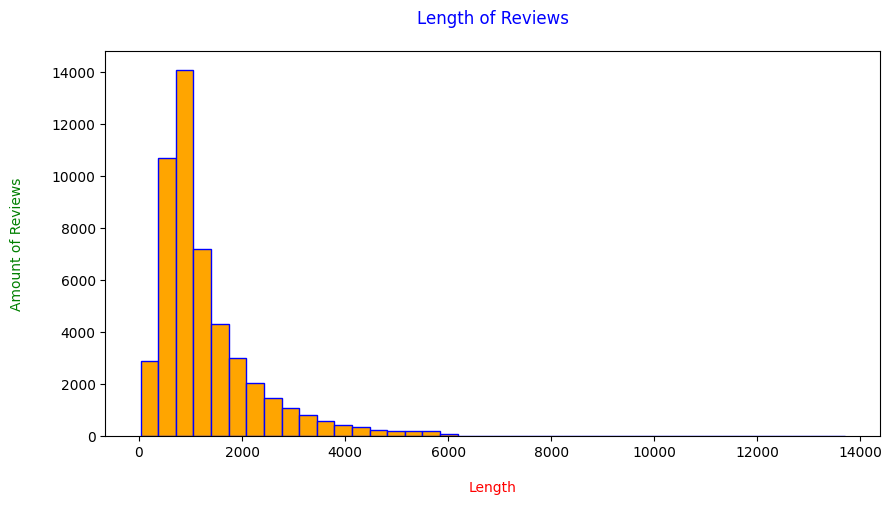

In [34]:
dataset["length"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Length of Reviews", color = "blue", pad = 20)
plt.xlabel("Length", labelpad = 15, color = "red")
plt.ylabel("Amount of Reviews", labelpad = 20, color = "green")

plt.show()

# *N-Gram Analysis*

In [35]:
print(Stopwords)
def Gram_Analysis(texts, ngram_range, max_features=20):
    # Convert set to list JUST for CountVectorizer
    vectorizer = CountVectorizer(
        ngram_range=(ngram_range, ngram_range),
        stop_words=list(Stopwords),  # Convert set to list here
        max_features=max_features
    )

    X = vectorizer.fit_transform(texts)
    features = vectorizer.get_feature_names_out()
    counts = X.sum(axis=0).A1
    return list(zip(features, counts))


{'into', 'own', 'that', "we're", "they'd", "they've", 'after', 'ain', 'herself', "we'd", 'in', 'was', 'ma', 'below', 'by', 'an', "you've", 'her', 'between', 'here', 'where', 'if', 'above', 'their', 'being', "it's", 'while', 'before', 'mightn', 'about', 'more', 'yourself', 'other', 'itself', 'than', "don't", 'haven', 'yourselves', 'all', 'its', "you'll", 'll', "we'll", 'any', 'from', 'can', 'your', 'both', "wouldn't", 'now', 'just', 'the', 'his', 'i', "i'm", "we've", 'shouldn', 'up', "couldn't", 'didn', 'm', 'with', 'these', 'very', 'did', "i've", 'o', 'will', "shan't", 'had', 'aren', 'it', 'there', 'off', 'don', 'were', "he'll", 'mustn', 'no', "should've", 'then', 'few', "aren't", 'won', "they'll", 'is', 're', 'myself', 'hasn', 'shan', 'so', 'they', "weren't", "it'll", 'theirs', 'too', "she'd", 'couldn', 'am', 'what', 'nor', 'you', 'again', "he's", "shouldn't", 'him', 's', 'this', 'because', 'once', 'most', 'has', 'down', "isn't", "he'd", 'she', 'each', 'at', "you'd", 'ourselves', "has